## 라이브러리 호출

In [29]:
import numpy as np
from scipy import stats
import pandas as pd
import statsmodels.api as sm

# 그래프 Visualization
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
mpl.rcParams['axes.unicode_minus'] = False
font_location = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
font_name = fm.FontProperties(fname = font_location).get_name()
mpl.rc('font',family= font_name)
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# Decision tree 예측
from sklearn.tree import export_graphviz
import graphviz
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

#랜덤 포레스트
from sklearn.ensemble import RandomForestRegressor

#그래디언트 부스팅
from sklearn.ensemble import GradientBoostingRegressor

# 정규분포 및 회귀분석 등
from statsmodels.stats.proportion import proportions_ztest
from statsmodels.formula.api import ols
from statsmodels.api import qqplot, add_constant
import statsmodels.formula.api as smf
from statsmodels.tools.eval_measures import rmse

# KNN
from sklearn.neighbors import KNeighborsRegressor

### 분류
#로지스틱 회귀분석
from statsmodels.api import Logit

# Decision tree
from sklearn.tree import DecisionTreeClassifier

#평가함수
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

#스케일링
from sklearn.preprocessing import scale, minmax_scale, robust_scale
#다중공선성 확인
from statsmodels.stats.outliers_influence import variance_inflation_factor
#선형 회귀모형
from sklearn.linear_model import LinearRegression
#변수선택법 (후진제거법)
from sklearn.feature_selection import RFE
#스케일 변환 -> 표준화 회귀계수 산출
from sklearn.preprocessing import StandardScaler

## 로데이터 호출

In [54]:
df_raw = pd.read_csv("/home/pirl/Statistics/Day3_0715/유방암.csv", engine = "python", encoding="CP949")
df_raw.head()

,diagnosis,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


## 로데이터 행*렬 모양을 확인하기 위해, 아래와 같이 명령어 입력

In [55]:
df_raw.shape

(569, 31)

## 결측값 확인하기 위해 isnull함수 사용

In [56]:
df_raw.isnull().sum(axis=0)

diagnosis                  0
mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
dtype: int64

## 아래 이상치 확인 결과, 두 변수에서 이상치 발견되었으나 명확한 변수에 대한 이해도가 없으므로, 변수를 그대로 사용해줌

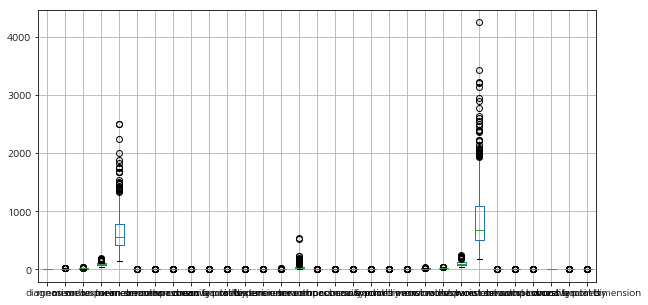

In [57]:
df_raw.boxplot(figsize= (10,5))

## 종속변수인 diagnosis 악성을 0에서 1로 다시 코딩해주기 위해 아래와 같은 절차를 밟음
## 결과 해석의 용의성을 위해, 실제 암이 발생하는 경우(악성)를 1로 두고자 함

## 악성 0->1 / 양성 1->0

In [58]:
df_raw["diagnosis"] = np.where(df_raw['diagnosis'] == 1,0,1)

## 의학 데이터임을 고려해, 정교한 데이터 가공을 위해 스케일링 실시

In [60]:
scaler = StandardScaler()
df_raw_scaled = scaler.fit_transform(df_raw)
df_raw_scaled = pd.DataFrame(df_raw_scaled, columns=df_raw.columns)

In [61]:
df_raw_scaled["diagnosis"] = np.where(df_raw_scaled['diagnosis']>0,1,0)

,diagnosis,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,0,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,0,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,0,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,0,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [63]:
df_raw_scaled

,diagnosis,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,0,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,0,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,0,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,0,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100
5,0,-0.476375,-0.835335,-0.387148,-0.505650,2.237421,1.244335,0.866302,0.824656,1.005402,...,-0.165498,-0.313836,-0.115009,-0.244320,2.048513,1.721616,1.263243,0.905888,1.754069,2.241802
6,0,1.170908,0.160649,1.138125,1.095295,-0.123136,0.088295,0.300072,0.646935,-0.064325,...,1.368983,0.322883,1.368325,1.275220,0.518640,0.021215,0.509552,1.196716,0.262476,-0.014730
7,0,-0.118517,0.358450,-0.072867,-0.218965,1.604049,1.140102,0.061026,0.281950,1.403355,...,0.163763,0.401048,0.099449,0.028859,1.447961,0.724786,-0.021054,0.624196,0.477640,1.726435
8,0,-0.320167,0.588830,-0.184080,-0.384207,2.201839,1.684010,1.219096,1.150692,1.965600,...,-0.161357,0.822813,-0.031609,-0.248363,1.662757,1.818310,1.280035,1.391616,2.389857,1.288650
9,0,-0.473535,1.105439,-0.329482,-0.509063,1.582699,2.563358,1.738872,0.941760,0.797298,...,-0.244190,2.443109,-0.286278,-0.297409,2.320295,5.112877,3.995433,1.620015,2.370444,6.846856


## scale 된 데이터를, X와, Y변수로 나누어줌

In [65]:
df_raw_x = df_raw_scaled.drop("diagnosis", axis = 1, inplace =False)
df_raw_y = df_raw_scaled["diagnosis"]

## 데이터를 Train 데이터와 Test 데이터로 나누어줌

In [68]:
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_raw_x, df_raw_y, test_size = 0.3, random_state=1234)
df_train_x, df_val_x, df_train_y, df_val_y = train_test_split(df_train_x, df_train_y, test_size = (0.3/0.7), random_state=1234)

print("train data X size : {}".format(df_train_x.shape))
print("train data Y size : {}".format(df_train_y.shape))
print("test data X size : {}".format(df_test_x.shape))
print("test data Y size : {}".format(df_test_y.shape))
print("validation data X size : {}".format(df_val_x.shape))
print("validation data Y size : {}".format(df_val_y.shape))

train data X size : (227, 30)
train data Y size : (227,)
test data X size : (171, 30)
test data Y size : (171,)
validation data X size : (171, 30)
validation data Y size : (171,)


## Tree 기본값으로 모델링 실시, 테스트셋 설명력 93.6%

In [69]:
tree_uncustomized = DecisionTreeClassifier(random_state=1234)
tree_uncustomized.fit(df_train_x, df_train_y)

print("Accuracy on training set: {:.3f}\n".format(tree_uncustomized.score(df_train_x,df_train_y)))
print("Accuracy on test set: {:.3f}\n".format(tree_uncustomized.score(df_val_x,df_val_y)))

Accuracy on training set: 1.000

Accuracy on test set: 0.936



## Depth 설정을 위해 1부터 50까지 깊이 확인

In [70]:
train_accuracy = []; test_accuracy = []

para_depth = [depth for depth in range (1,51)]

for v_max_depth in para_depth :
    tree = DecisionTreeClassifier(max_depth = v_max_depth, random_state = 1234)
    tree.fit(df_train_x, df_train_y)
    train_accuracy.append(tree.score(df_train_x, df_train_y))
    test_accuracy.append(tree.score(df_val_x, df_val_y))
    
df_accuracy_depth = pd.DataFrame()
df_accuracy_depth["Depth"] = para_depth
df_accuracy_depth["TrainAccuracy"] = train_accuracy
df_accuracy_depth["TestAccuracy"] = test_accuracy


df_accuracy_depth["D"] = df_accuracy_depth["TrainAccuracy"]-df_accuracy_depth["TestAccuracy"]

df_accuracy_depth.round(3)

,Depth,TrainAccuracy,TestAccuracy,D
0,1,0.943,0.912,0.030
1,2,0.982,0.942,0.041
2,3,0.982,0.942,0.041
3,4,0.996,0.936,0.060
4,5,1.000,0.936,0.064
5,6,1.000,0.936,0.064
6,7,1.000,0.936,0.064
7,8,1.000,0.936,0.064
8,9,1.000,0.936,0.064
9,10,1.000,0.936,0.064


## 위 표와 아래 그래프 확인 시, 정확도가 높아지는 Max Depth를 2로 설정

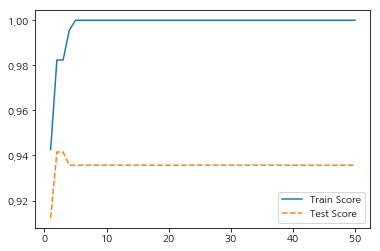

In [72]:
plt.plot(para_depth, train_accuracy, linestyle = '-', label = 'Train Score')
plt.plot(para_depth, test_accuracy, linestyle = '--', label = "Test Score")
plt.legend()

## 트리 맵을 그리기 위해, x변수를 별도로 저장해줌

In [151]:
v_feature_name = df_train_x.columns

## Depth를 2로 설정한 후, split 최소 샘플수를 확인, 1부터 100까지

In [73]:
train_accuracy = []; test_accuracy = []

para_split = [n_split * 10 for n_split in range (1,11)]

for v_min_samples_split in para_split :
    tree = DecisionTreeClassifier(min_samples_split = v_min_samples_split, max_depth = 2, random_state = 1234)
    tree.fit(df_train_x, df_train_y)
    train_accuracy.append(tree.score(df_train_x, df_train_y))
    test_accuracy.append(tree.score(df_val_x, df_val_y))
    
df_accuracy_split = pd.DataFrame()
df_accuracy_split["MinSamplesSplit"] = para_split
df_accuracy_split["TrainAccuracy"] = train_accuracy
df_accuracy_split["TestAccuracy"] = test_accuracy


df_accuracy_split["D"] = df_accuracy_split["TrainAccuracy"]-df_accuracy_split["TestAccuracy"]

df_accuracy_split.round(3)

,MinSamplesSplit,TrainAccuracy,TestAccuracy,D
0,10,0.982,0.942,0.041
1,20,0.982,0.942,0.041
2,30,0.982,0.942,0.041
3,40,0.982,0.942,0.041
4,50,0.982,0.942,0.041
5,60,0.982,0.942,0.041
6,70,0.982,0.942,0.041
7,80,0.974,0.936,0.038
8,90,0.974,0.936,0.038
9,100,0.974,0.936,0.038


## 위 표와 아래 그래프 확인 시, 정확도가 높아지는 Min samples of split을 10으로 설정

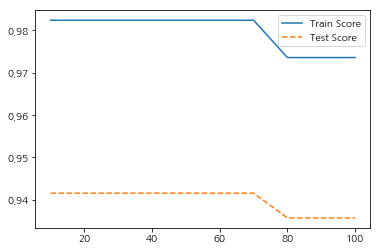

In [74]:
plt.plot(para_split, train_accuracy, linestyle = '-', label = 'Train Score')
plt.plot(para_split, test_accuracy, linestyle = '--', label = "Test Score")
plt.legend()

## Depth를 2, Split을 10으로 설정한 후, leaf 단위의 최소 샘플수를 확인, 2부터 20까지

In [75]:
train_accuracy = []; test_accuracy = []

para_leaf = [n_leaf * 2 for n_leaf in range (1,11)]

for v_min_samples_leaf in para_leaf :
    tree = DecisionTreeClassifier(min_samples_leaf = v_min_samples_leaf,min_samples_split = 20, max_depth = 14, random_state = 1234)
    tree.fit(df_train_x, df_train_y)
    train_accuracy.append(tree.score(df_train_x, df_train_y))
    test_accuracy.append(tree.score(df_val_x, df_val_y))
    
df_accuracy_leaf = pd.DataFrame()
df_accuracy_leaf["MinSamplesleaf"] = para_leaf
df_accuracy_leaf["TrainAccuracy"] = train_accuracy
df_accuracy_leaf["TestAccuracy"] = test_accuracy


df_accuracy_leaf["D"] = df_accuracy_leaf["TrainAccuracy"]-df_accuracy_leaf["TestAccuracy"]

df_accuracy_leaf.round(3)

,MinSamplesleaf,TrainAccuracy,TestAccuracy,D
0,2,0.982,0.942,0.041
1,4,0.974,0.936,0.038
2,6,0.974,0.936,0.038
3,8,0.969,0.930,0.039
4,10,0.969,0.930,0.039
5,12,0.960,0.936,0.025
6,14,0.952,0.924,0.028
7,16,0.943,0.912,0.030
8,18,0.943,0.912,0.030
9,20,0.943,0.912,0.030


## 위 표와 아래 그래프 확인 시, 정확도가 가장 높은 Min samples of leaf를 2로 설정

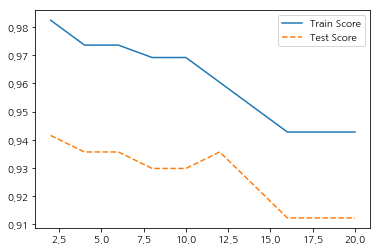

In [76]:
plt.plot(para_leaf, train_accuracy, linestyle = '-', label = 'Train Score')
plt.plot(para_leaf, test_accuracy, linestyle = '--', label = "Test Score")
plt.legend()

## 모든 변수 확인 시, Depth 2 / Split 10 / leaf 2로 설정하여 모델링 실시

In [77]:
tree_final = DecisionTreeClassifier(random_state = 1234, max_depth=2, min_samples_split=10, min_samples_leaf=2)
tree_final.fit(df_train_x, df_train_y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=2, min_samples_split=10,
            min_weight_fraction_leaf=0.0, presort=False, random_state=1234,
            splitter='best')

## 마지막 test 데이터를 이용하여 최종 데이터 검증

## 악성 종양을 악성 종양으로 판단, 양성 종양을 양성 종양으로 판단할 정확률은 90.1%수준으로 나타났음, 하지만 의료용 데이터이므로 90% 수준의 예측력은 현업에서 사용하기에는 무리가 있으므로, 다른 적합한 모델을 사용해야 함

## 정분류(양성을 양성으로 판단한 데이터 52건, 악성을 악성으로 판단한 데이터 102건)

## 오분류 (양성을 악성으로 판단한 데이터 14건, 악성을 양성으로 판단한 데이터 3건)

In [78]:
y_pred = tree_final.predict(df_test_x)

print("Accuracy: {0:.3f}\n".format(tree_final.score(df_test_x, df_test_y)))
print("Confusion Matrix: \n{}".format(confusion_matrix(df_test_y, y_pred)))

Accuracy: 0.901

Confusion Matrix: 
[[ 52  14]
 [  3 102]]


## Gridsearch에 의해 최적화된 파라미터는 d : 2 / l : 2 / split : 20 

In [80]:
estimator = DecisionTreeClassifier()

param_grid = {"max_depth":para_depth, "min_samples_split":para_split,
             "min_samples_leaf":para_leaf}

grid_dt = GridSearchCV(estimator, param_grid, scoring="accuracy", n_jobs = -1)
grid_dt.fit(df_train_x, df_train_y)

print("best estimator model: \n{}".format(grid_dt.best_estimator_))
print("\nbest parameter: \n{}".format(grid_dt.best_params_))
print("\nbest score:\n{}".format(grid_dt.best_score_.round(3)))

best estimator model: 
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=2, min_samples_split=20,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

best parameter: 
{'max_depth': 2, 'min_samples_leaf': 2, 'min_samples_split': 20}

best score:
0.93


## Grid Search로 도출된 파라미터로 돌려도 동일한 결과 도출

In [95]:
tree_final = DecisionTreeClassifier(random_state = 1234, max_depth=2, min_samples_split=20, min_samples_leaf=2)
tree_final.fit(df_train_x, df_train_y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=2, min_samples_split=20,
            min_weight_fraction_leaf=0.0, presort=False, random_state=1234,
            splitter='best')

In [96]:
y_pred = tree_final.predict(df_test_x)

print("Accuracy: {0:.3f}\n".format(tree_final.score(df_test_x, df_test_y)))
print("Confusion Matrix: \n{}".format(confusion_matrix(df_test_y, y_pred)))

Accuracy: 0.901

Confusion Matrix: 
[[ 52  14]
 [  3 102]]


## 최종 도출된 DECISION TREE는 아래와 같은 모습임

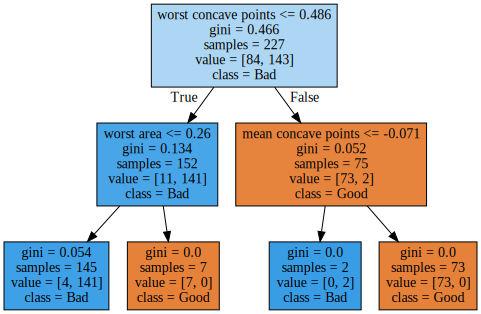

In [97]:
v_feature_name = df_train_x.columns

export_graphviz(tree_final, out_file = "tree_final.dot", class_names=["Good", "Bad"]
               ,feature_names=v_feature_name,impurity=True, filled=True)

with open("tree_final.dot") as f :
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

## DECISION TREE 모델 내 변수 중요도는 아래와 같음

In [98]:
df_importance = pd.DataFrame()
df_importance["Feature"] = v_feature_name
df_importance['Importance'] = tree_final.feature_importances_

df_importance.sort_values("Importance", ascending = False, inplace = True)
df_importance.round(3)

,Feature,Importance
27,worst concave points,0.832
23,worst area,0.129
7,mean concave points,0.040
0,mean radius,0.000
16,concavity error,0.000
28,worst symmetry,0.000
26,worst concavity,0.000
25,worst compactness,0.000
24,worst smoothness,0.000
22,worst perimeter,0.000


## Worst Concave points/ Worst Area 두변수가 상대적으로 중요한 변수로 나타남

Text(0, 0.5, '변수')

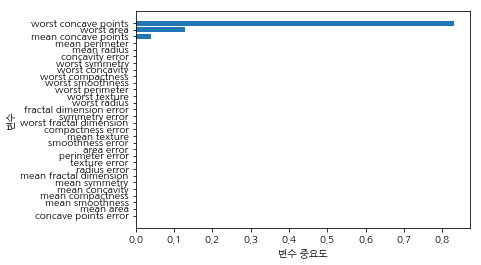

In [99]:
df_importance.sort_values("Importance", ascending=True, inplace=True)
coordinates = range(len(df_importance))
plt.barh(y=coordinates, width = df_importance["Importance"])
plt.yticks(coordinates, df_importance['Feature'])
plt.xlabel("변수 중요도")
plt.ylabel("변수")